## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator` and set it to `GPU`.

In [1]:
!nvidia-smi

Tue May 23 00:55:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Download dataset from Roboflow Universe

You will need your `API_KEY`. You can find it by clicking on your profile in the upper right corner of the Roboflow app, then `Settings`. You will be redirected to `Roboflow: Settings` page. Now on the left, below `WORKSPACES` click in `Roboflow` -> `Roboflow API`. Copy the `Private API Key`. Run the cell below with `Shift + Enter`. Paste your `API_KEY` in the prompt. 

In [2]:
from getpass import getpass

# copy your API KEY from 
api_key = 'BsNcqAZAq7PVD15dQHhZ'

BsNcqAZAq7PVD15dQHhZ··········


In [3]:
!pip install ultralytics
!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key=api_key)
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.106, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:02<00:00, 3790.93it/s]


### Retreinando


In [4]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8n.pt')
 
# Training.
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolov8n.pt epochs=5 plots=True name=yolov8n_custom

100%|██████████| 6.23M/6.23M [00:00<00:00, 73.4MB/s]


Ultralytics YOLOv8.0.106 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/crack-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fal

/content


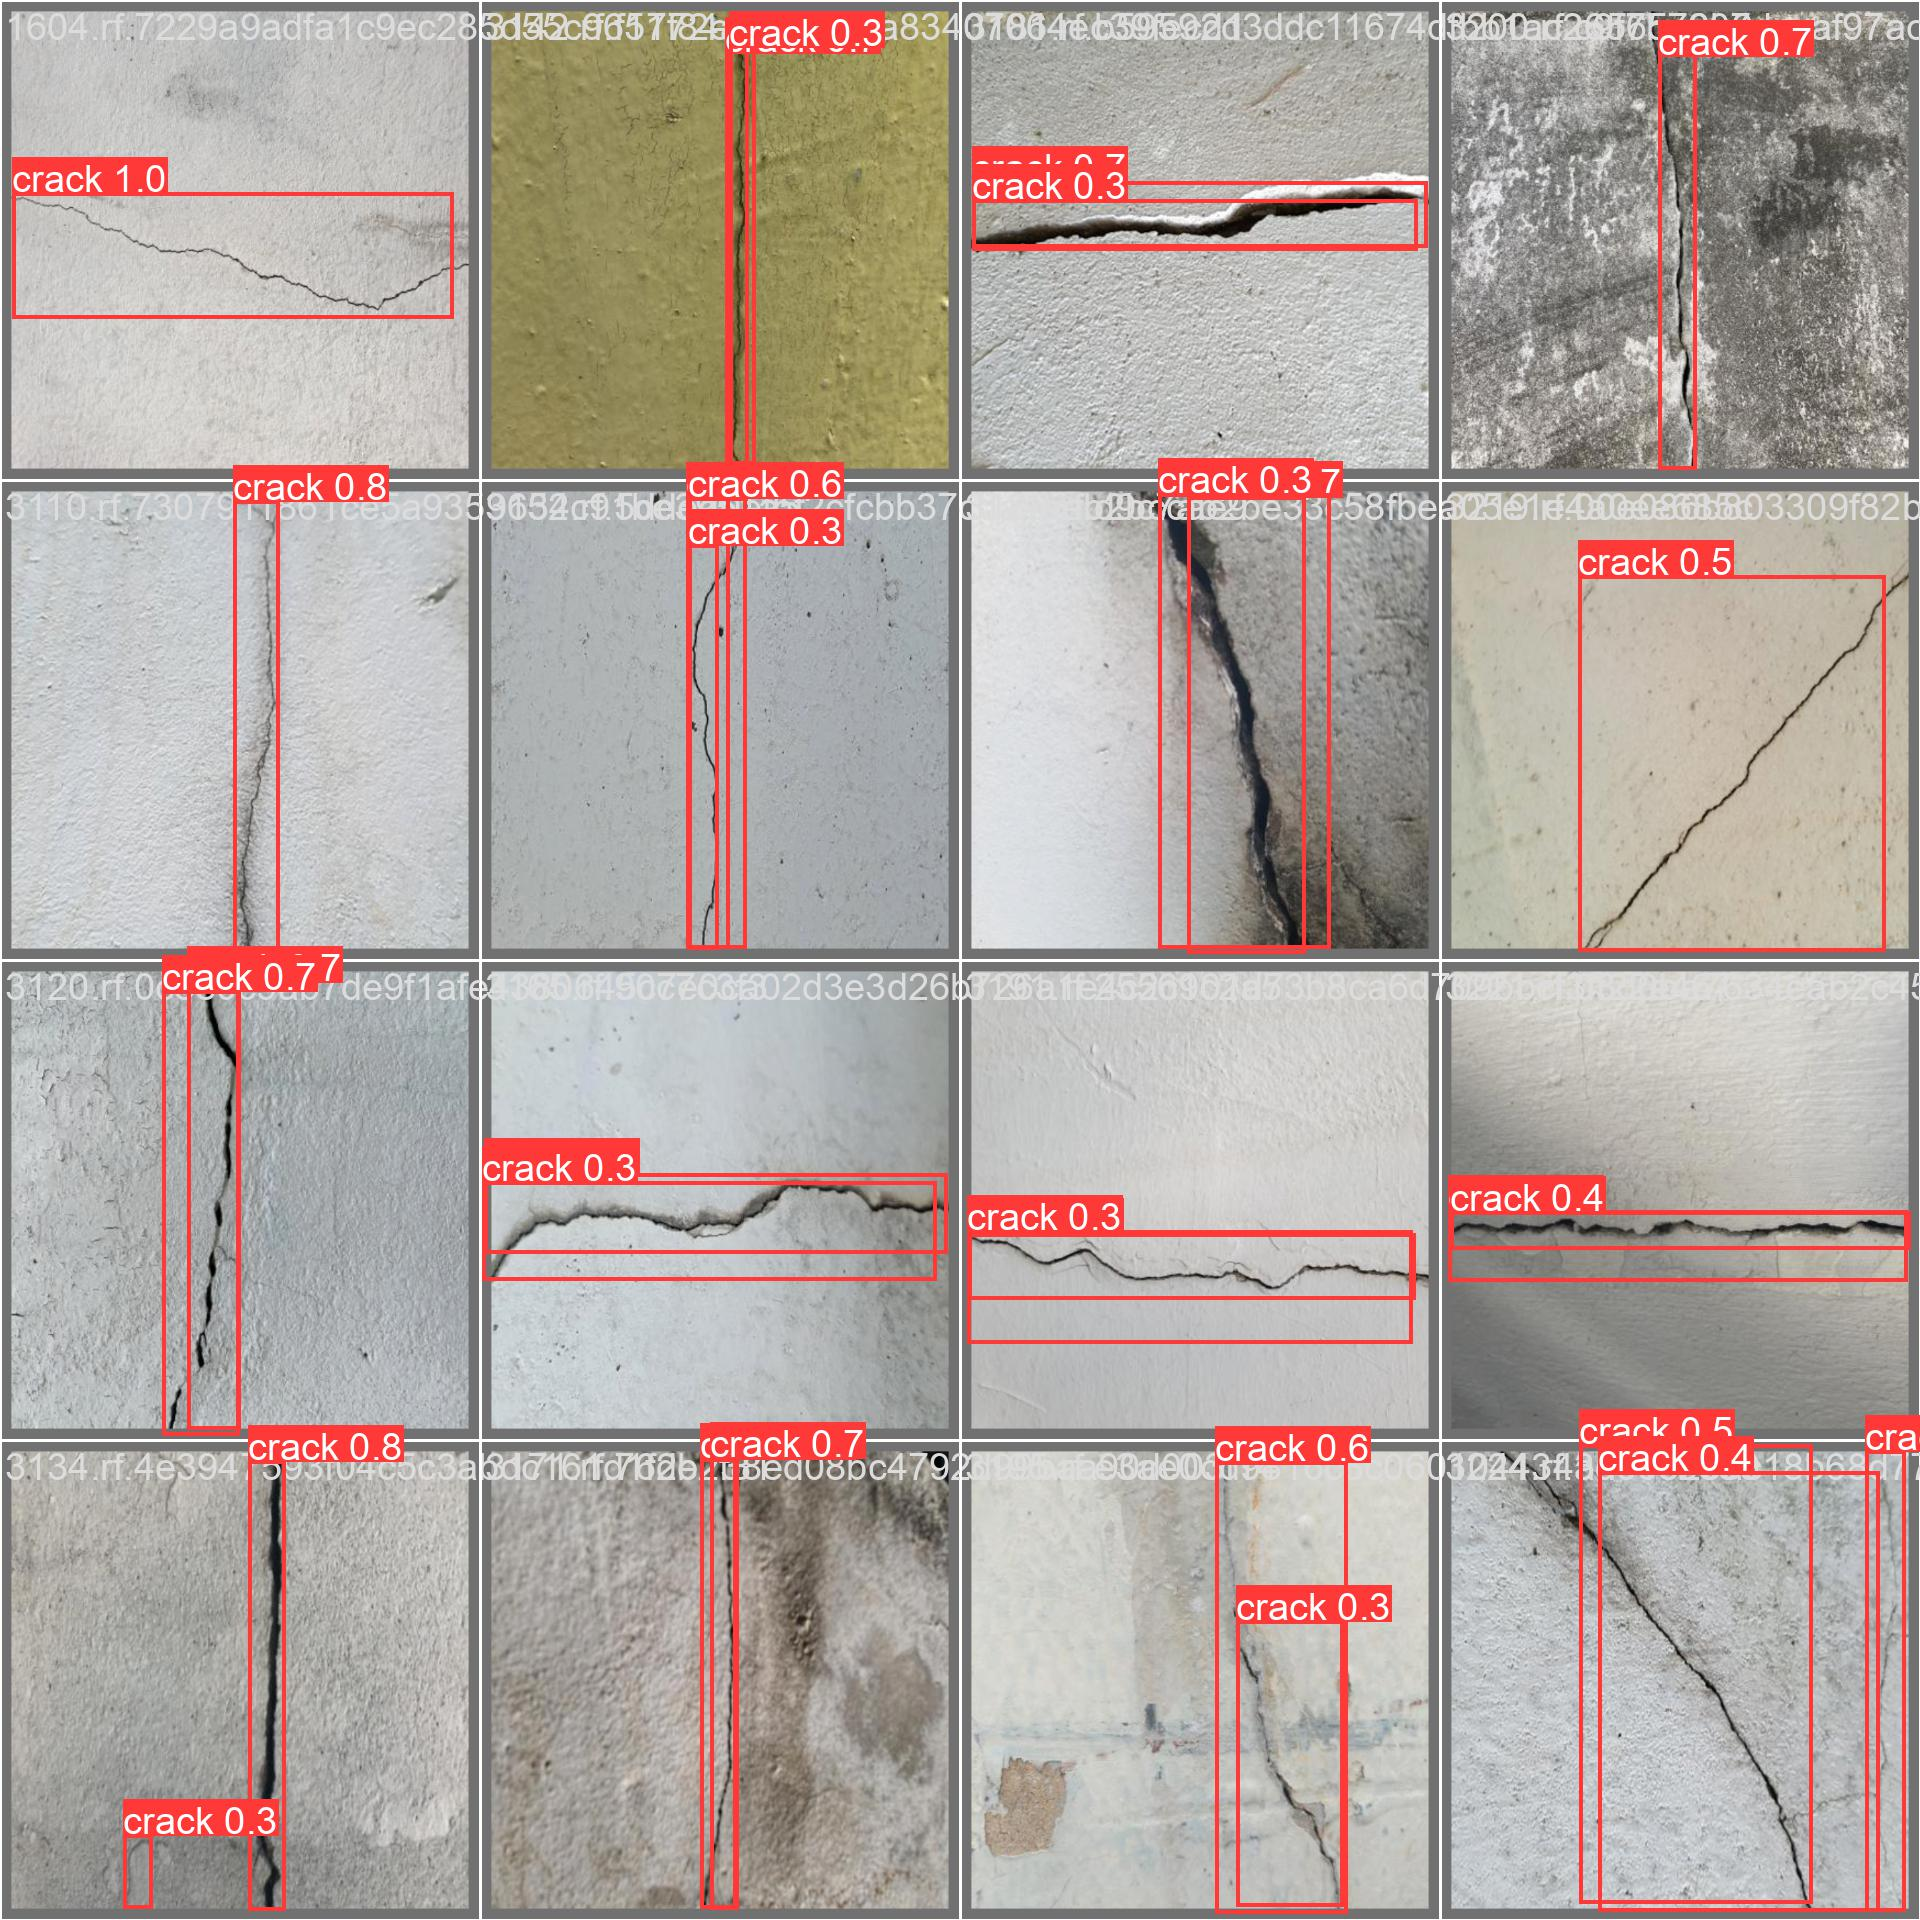

In [9]:
import os

HOME = os.getcwd()

%cd {HOME}
from IPython.display import display, Image

Image(filename=f'{HOME}/runs/detect/yolov8n_custom/val_batch0_pred.jpg', width= 700)

In [5]:
from google.colab import files
files.download('./runs/detect/yolov8n_custom/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>